In [45]:
from glob import glob
from pprint import pprint
from random import sample

import matplotlib.pyplot as plt
from numpy import mean

import texte

In [46]:
# with open("LGERM.json", encoding="utf-8") as f:
#     LGERM = json.load(f)
# mots_LGERM = set(LGERM)

path = "Corpus/Mazarinades/*/*.xml"

files = glob(path)

print(len(files))

3065


texte.corpora(path)

Distribution mots outils

OCR performance prediction using cross-OCR
alignment
Ahmed BEN SALAH*, Jean philippe MOREUXt
, Nicolas RAGOT+ and Thierry PAQUET§

https://dl.acm.org/doi/pdf/10.1145/2595188.2595221


sample_mode = False

if sample_mode:
    files = sample(files, 200)
#     collection_textes = [texte.Texte(file) for file in tqdm(files)]
# else:
collection_textes = [e for e in texte.corpora(files) if e.plain]


collection_textes[0].texte

In [47]:
import pickle

with open("collection_textes.pickle", mode="rb") as f:
    collection_textes = pickle.load(f)
import texte


In [48]:
counter_lexiques = {l : 0 for l in texte.Texte.lexique}
for txt in collection_textes:
    try:
        counter_lexiques[txt.langue] += 1
    except KeyError:
        print(f"{txt.path} : {txt.langue}")
        counter_lexiques[txt.langue] = 1


counter_lexiques

{'ducange': 0, 'LGERM': 2357, 'tlfi': 707, 'morphalou': 0, 'glaff': 0}

In [49]:
ratio_lexiques = {k: (v/len(files))*100 for k, v in counter_lexiques.items()}
ratio_lexiques

{'ducange': 0.0,
 'LGERM': 76.9004893964111,
 'tlfi': 23.066884176182707,
 'morphalou': 0.0,
 'glaff': 0.0}

In [50]:
[(e, len(v)) for e, v in texte.Texte.lexique.items()]

[('ducange', 103083),
 ('LGERM', 2765324),
 ('tlfi', 365737),
 ('morphalou', 740830),
 ('glaff', 1082688)]

In [51]:
texte.Texte.lexique["ducange"]

{'longi',
 'amogabari',
 'retroaccapitum',
 'lahslita',
 'ortulanus',
 'fatio',
 'matrasta',
 'karle',
 'archijurare',
 'privilegium',
 'care',
 'sobornik',
 'picuoto',
 'grepia anchoræ',
 'in parabolis',
 'alluveo',
 'aspergo',
 'interlineare',
 'todinus',
 'adconsiliare',
 'demolere',
 'hallagium',
 'alchamia',
 'agrimonia',
 'clarificare',
 'bubo',
 'superapprehendere',
 'gingnasium',
 'alluetum',
 'circumferentia',
 'tonnellus',
 'vireli',
 'ravanna',
 'datiarius',
 'hechoita',
 'chorodidactes',
 'empoysonare',
 'defedare',
 'perceri',
 'litania major',
 'lottus',
 'fiscales populi',
 'mabrana',
 'cachinare',
 'malleverium',
 'dare per gulam',
 'jurare regimen',
 'minga',
 'impellare',
 'anni minores',
 'segrealis',
 'brennium',
 'solerius',
 'ragaczinus',
 'conniventia',
 'sollus',
 'spata tracta jurare',
 'adventuraria societas',
 'flamininus honor',
 'convincere terram suam',
 'strucios',
 'ardica',
 'onredeleiker',
 'anteritas priorum',
 'exartarius',
 'imaginarii',
 'portemia'

In [52]:
lex_moyenne = {l : 0 for l in texte.Texte.lexique}
print(lex_moyenne)

for t in collection_textes:
    for k, v in t.dict_lexicalite.items():
        lex_moyenne[k] += v

lex_moyenne = {k: v/len(collection_textes) for k, v in lex_moyenne.items()}
lex_moyenne

{'ducange': 0, 'LGERM': 0, 'tlfi': 0, 'morphalou': 0, 'glaff': 0}


{'ducange': 0.19697848085242564,
 'LGERM': 0.6273147641908727,
 'tlfi': 0.6206505482280844,
 'morphalou': 0.536034100384349,
 'glaff': 0.5203002650270439}

In [89]:
lst_morpahlou = [txt for txt in collection_textes if txt.langue == "morphalou"]
for e in lst_morpahlou:
    m, o = sorted(e.dict_lexicalite.items(), key=lambda x: x[1], reverse=True)[:2]
    print(m[1] - o[1])

In [54]:
import json

lst = [[files[i], e.header, e.texte] for i, e in enumerate(collection_textes)]

with open("headers.json", "w") as f:
    json.dump(lst, f, indent=4, ensure_ascii=False)

In [55]:
import pandas as pd

df0 = pd.DataFrame(txt.header for txt in collection_textes)
df = pd.DataFrame(
    ((txt.path.name, txt.n_pages, txt.hapax_ratio, txt.ttr, txt.lexicalite) for txt in collection_textes),
    columns = ["fichier", "n_pages", "hapax_ratio", "ttr", "lexicalite"]
)
concat = pd.concat([df, df0], axis=1)

In [56]:
concat.drop("titre", axis=1).to_csv("stats.csv", sep=";")

In [57]:
concat

,fichier,n_pages,hapax_ratio,ttr,lexicalite,form,genre,subject,handwritten_note,table_of_content,illustration,creation,change,titre,dates,langue,fichier,langue_detectee,subgenre
0,Moreau100_GALL.xml,7,0.672209,0.826942,0.679860,vers,"[poésie, burlesque, satirique]","Conti, Armand de Bourbon, prince de, 1629-1666",False,False,False,1650-01-18,"{'@status': 'corrected', '@when': '2022-09-06'...",L'apologie de l'autruche en vers burlesques.,"[{'@type': 'file_creation', '@when': '2021-02-...",fra,Moreau100_GALL.xml,LGERM,NaN
1,Moreau13_GALL.xml,6,0.651292,0.839272,0.708551,vers,"[pamphlet, satirique]",Scarron,False,False,False,NaN,"{'@status': 'corrected', '@when': '2022-09-23'...",A un ministre d’État sur les œufs,"{'@type': 'file_creation', '@when': '2021-11-0...",fra,Moreau13_GALL.xml,LGERM,NaN
2,Moreau14_GBOOKS.xml,7,0.594727,0.744542,0.660324,prose,nouvelles,"[Beaufort, François de Bourbon-Vendôme, duc de...",False,False,False,1652-07-30,"{'@status': 'corrected', '@when': '2022-03-24'...",L’abolition de M. le duc de Beaufort au parlem...,"{'@type': 'file_creation', '@when': '2021-11-0...",fra,Moreau14_GBOOKS.xml,LGERM,NaN
3,Moreau17_GBOOKS.xml,7,0.737926,0.820080,0.533981,"[vers, prose]",NaN,NaN,False,False,False,1649-03-30,"{'@status': 'corrected', '@when': '2022-03-24'...",Les acclamations de joie des bons Parisiens su...,"{'@type': 'file_creation', '@when': '2021-11-0...",fra,Moreau17_GBOOKS.xml,tlfi,NaN
4,Moreau18_GBOOKS.xml,7,0.688969,0.799109,0.572672,prose,articles,NaN,False,False,False,1649-01-30,"{'@status': 'corrected', '@when': '2022-10-25'...",L'accord passé entre les quatre empereurs de l...,"{'@type': 'file_creation', '@when': '2022-10-2...",fra,Moreau18_GBOOKS.xml,tlfi,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3059,Socard85_GALL.xml,5,0.735113,0.686311,0.654832,vers,pamphlet,Scarron,False,False,False,NaN,"{'@status': 'corrected', '@when': '2022-08-09'...",Touche aux plumes vénales et ingrates de ce\n ...,"{'@type': 'file_creation', '@when': '2021-11-0...",fra,Socard85_GALL.xml,LGERM,NaN
3060,Socard86_GBOOKS.xml,15,0.603287,0.712047,0.593036,prose,"[rhétorique délibérative, remontrances]",None,False,False,False,NaN,"{'@status': 'corrected', '@when': '2022-08-09'...",Très-humbles remontrances à Mademoiselle et à ...,"{'@type': 'file_creation', '@when': '2021-11-0...",fra,Socard86_GBOOKS.xml,LGERM,NaN
3061,Socard87_GBOOKS.xml,12,0.604326,0.723362,0.623345,prose,"[didactique, sermon]",None,False,False,False,NaN,"{'@status': 'corrected', '@when': '2022-08-08'...",Troisième et dernier sermon de l’Eucharistie p...,"{'@type': 'file_creation', '@when': '2021-11-0...",fra,Socard87_GBOOKS.xml,LGERM,NaN
3062,Socard93_GBOOKS.xml,12,0.597750,0.706215,0.660578,prose,"[nouvelles, récit, discours adressé]",Emprisonnement des\n Princes,False,False,False,NaN,"{'@status': 'corrected', '@when': '2022-08-09'...",Particularités (Les) de la détention des Princ...,"{'@type': 'file_creation', '@when': '2021-11-0...",fra,Socard93_GBOOKS.xml,tlfi,NaN


In [58]:
concat.to_csv("stats.csv", sep=";")


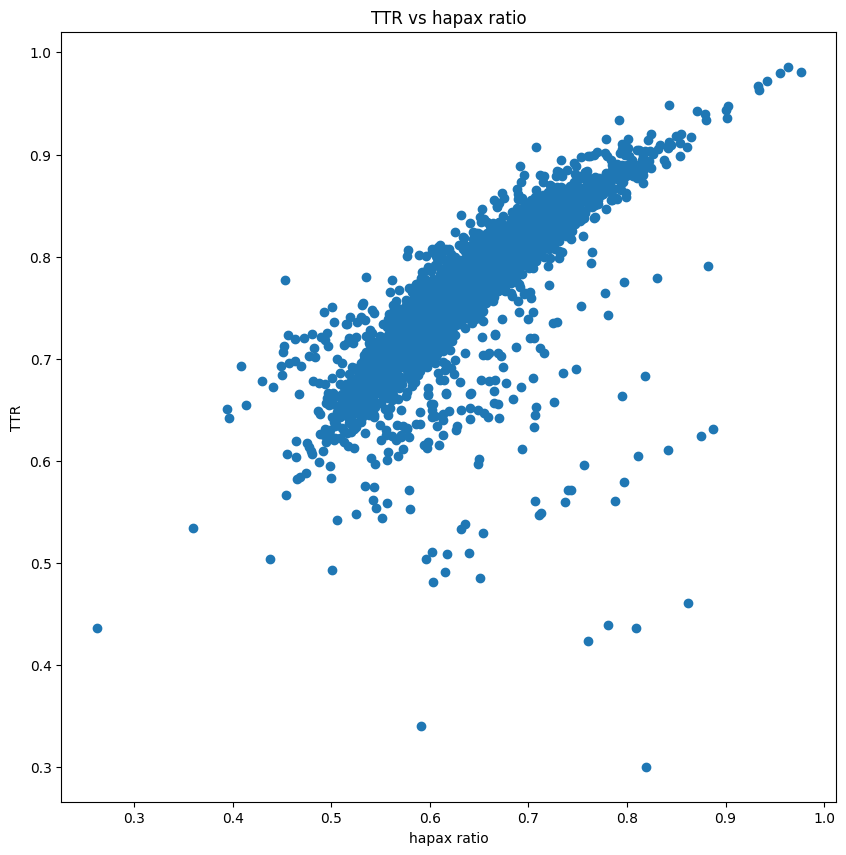

In [59]:
#tup = [(val["hapax_ratio"], val["ttr"]) for val in dict_stats.values()]
tup = [(txt.hapax_ratio, txt.ttr) for txt in collection_textes]

plt.figure(figsize=(10, 10))
plt.title("TTR vs hapax ratio")
plt.xlabel("hapax ratio")
plt.ylabel("TTR")

plt.scatter(*zip(*tup))

plt.show()

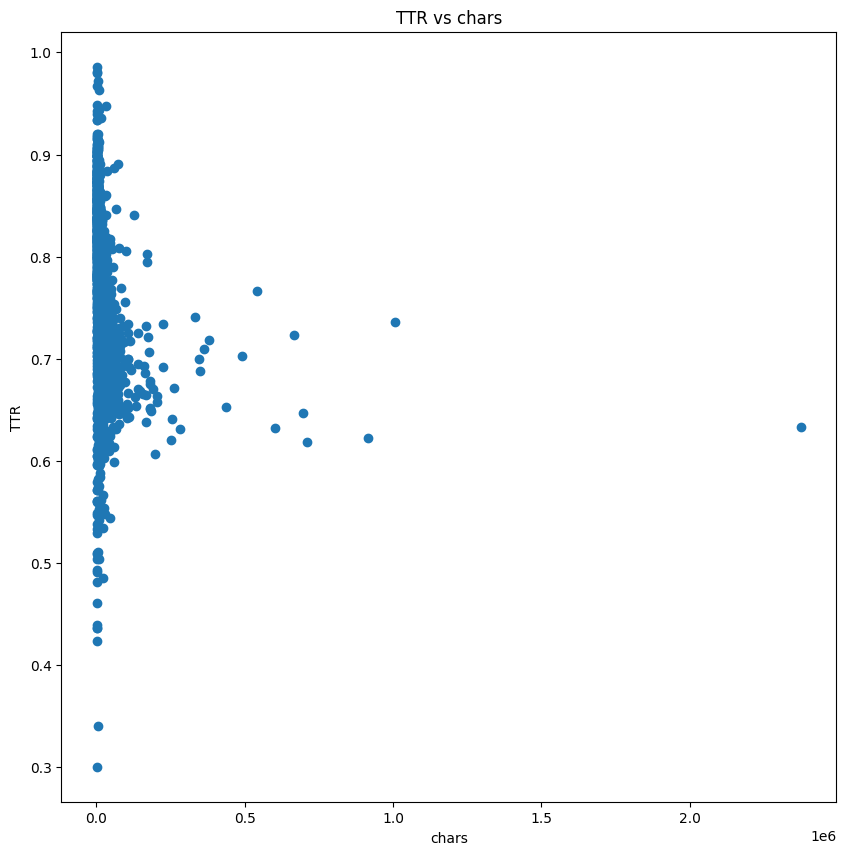

In [60]:
# tup = [(val["chars"], val["ttr"]) for val in dict_stats.values()]
tup = [(txt.n_chars, txt.ttr) for txt in collection_textes]

plt.figure(figsize=(10, 10))
plt.title("TTR vs chars")
plt.xlabel("chars")
plt.ylabel("TTR")

plt.scatter(*zip(*tup))

plt.show()

In [61]:
x = [txt.n_pages for txt in collection_textes]
print(mean(x))

13.150783289817232


In [62]:
mean([len(txt.texte) for txt in collection_textes])

13.150783289817232

In [63]:
x = [len(txt.plain) for txt in collection_textes]
print(mean(x))

18891.322780678853


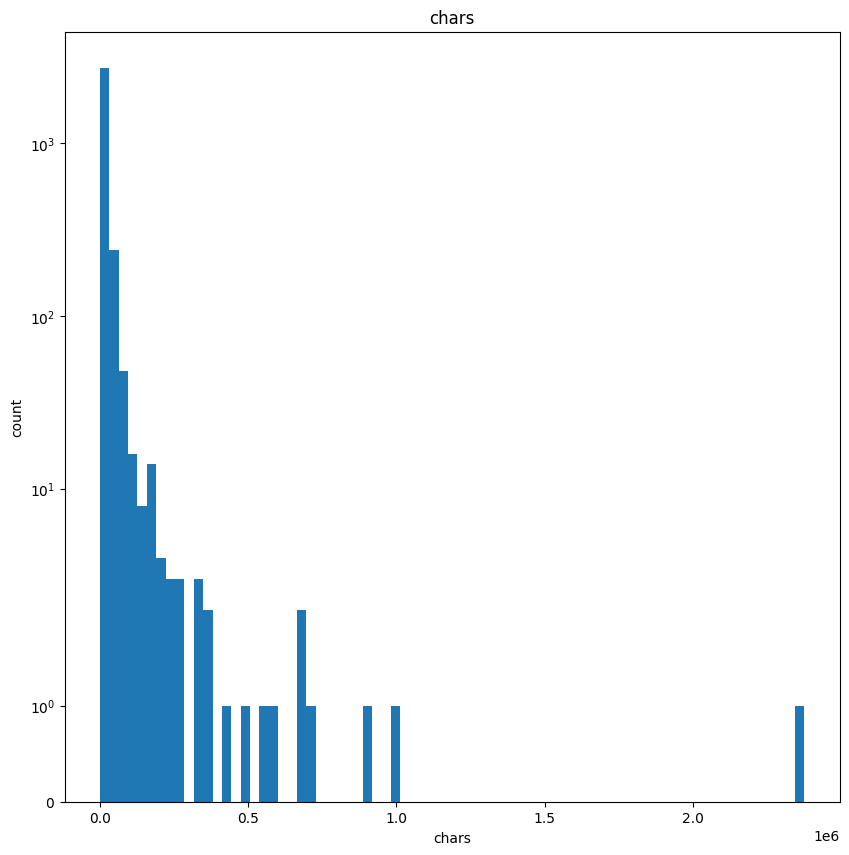

18455.437663185377


In [64]:
# x = [v["chars"] for v in dict_stats.values()]
x = [txt.n_chars if txt.n_chars else 0 for txt in collection_textes]

plt.figure(figsize=(10, 10))
plt.title("chars")
plt.xlabel("chars")
plt.ylabel("count")
plt.xscale('linear')
plt.yscale('symlog', linscale=1)
plt.hist(x, bins=75)

plt.show()

print(mean(x))

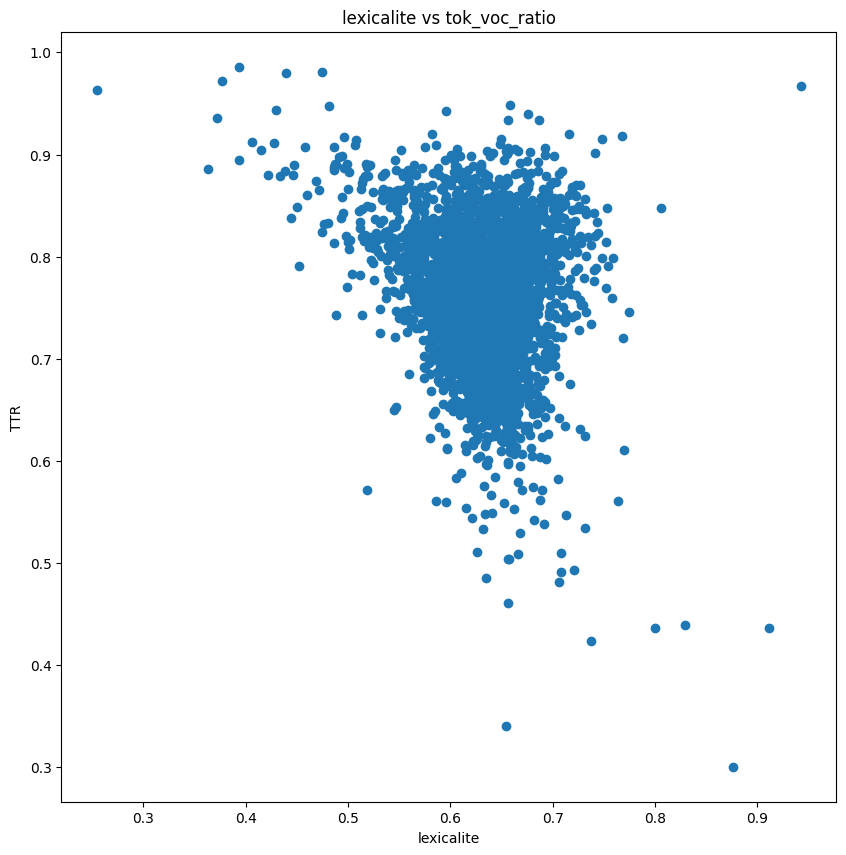

In [65]:
# tup = [(val["tok_voc_ratio"], val["ttr"]) for val in dict_stats.values()]
tup = [(txt.lexicalite, txt.ttr) for txt in collection_textes]

plt.figure(figsize=(10, 10))
plt.title("lexicalite vs tok_voc_ratio")
plt.xlabel("lexicalite")
plt.ylabel("TTR")

plt.scatter(*zip(*tup))

plt.show()

In [66]:
x = [txt.header["change"]["@status"] if isinstance(txt.header["change"], dict) else txt.header["change"][0]["@status"]
for txt in collection_textes]
len(x) / len([e for e in x if e == "corrected"])

1.0

In [67]:
for txt in collection_textes:
    pprint(txt.header)
    break

{'change': {'@status': 'corrected', '@when': '2022-09-06', '@who': 'AB'},
 'creation': '1650-01-18',
 'dates': [{'#text': '16 février 2021',
            '@type': 'file_creation',
            '@when': '2021-02-16'},
           {'#text': '23 avril 2021',
            '@type': 'correction',
            '@when': '2021-04-23'}],
 'fichier': 'Moreau100_GALL.xml',
 'form': 'vers',
 'genre': ['poésie', 'burlesque', 'satirique'],
 'handwritten_note': False,
 'illustration': False,
 'langue': 'fra',
 'langue_detectee': 'LGERM',
 'subject': 'Conti, Armand de Bourbon, prince de, 1629-1666',
 'table_of_content': False,
 'titre': "L'apologie de l'autruche en vers burlesques."}


In [68]:
txt.ttr, txt.lexicalite

(0.8269423203551629, 0.6798603026775321)

In [69]:
def stats(key):
    stats = {}
    for txt in collection_textes:
        type_ = txt.header["form"] if isinstance(txt.header["form"], str) else tuple(txt.header["form"])

        if type_ not in stats:
            for e in stats.keys():
                if set(e) == set(type_):
                    type_ = e
                    break
            else:
                stats[type_] = []

        stats[type_].append(getattr(txt, key))

    # for k in stats:
    #     v = stats[k]
    #     v = [e for e in v if e]
    #     print(f"{k}: {mean(v):.3f}")
    #     stats[k] = v

    for k, v in stats.items():
        print(f"{k}: {mean(v):.3f}")

    plot = [(" ".join(k), mean(v)) for k, v in stats.items()]
    plot = sorted(plot, key=lambda x: x[1], reverse=True)

    plt.figure(figsize=(10, 10))
    plt.title(f"mean {key}")
    plt.xlabel("type")
    plt.ylabel(f"mean {key}")

    plt.bar(*zip(*plot))

    plt.show()

vers: 0.813
prose: 0.744
('vers', 'prose'): 0.756
('prose', 'manifeste'): 0.712
('prose', 'récit'): 0.788


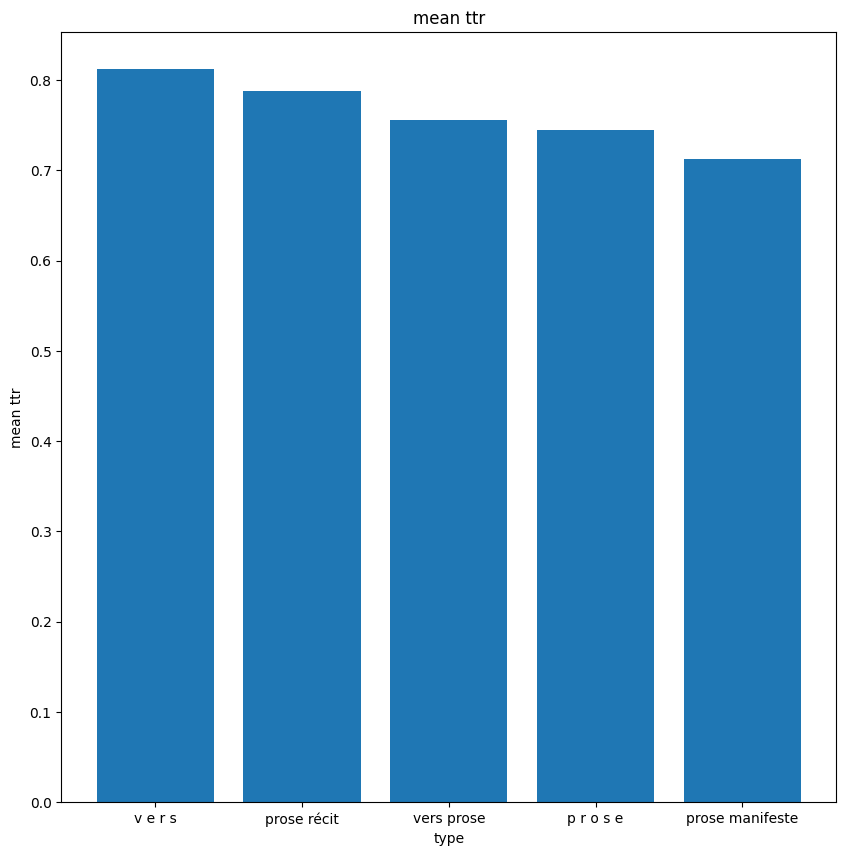

In [70]:
stats("ttr")


vers: 0.685
prose: 0.623
('vers', 'prose'): 0.629
('prose', 'manifeste'): 0.579
('prose', 'récit'): 0.621


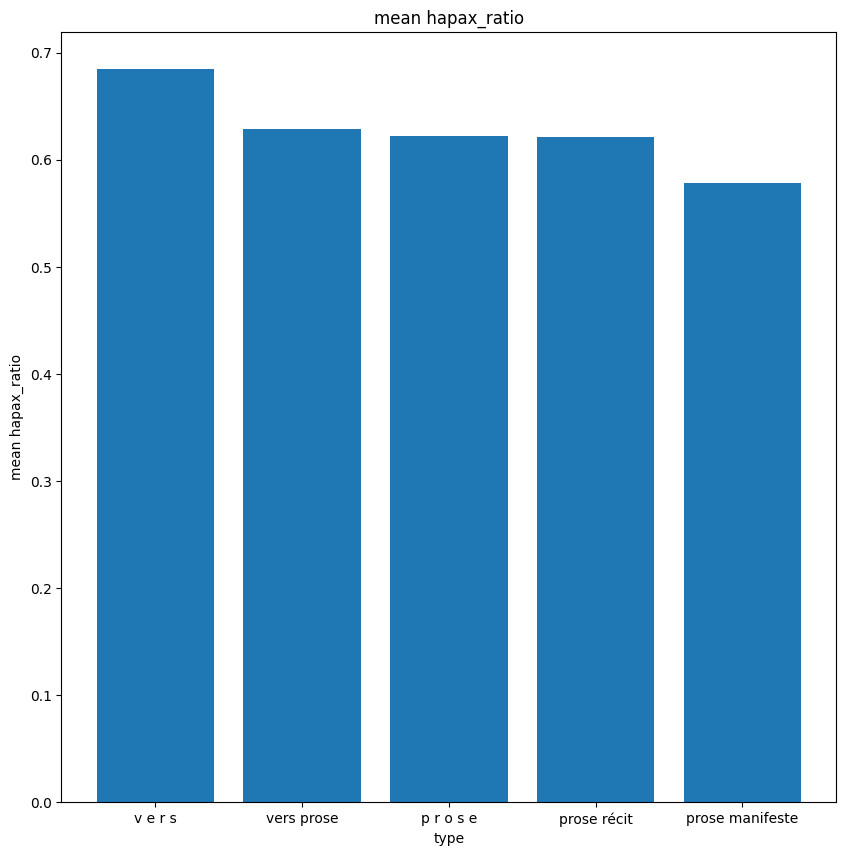

In [71]:
stats("hapax_ratio")

In [72]:
def stats2(header_prop, stats_prop):
    stats = {}
    for txt in collection_textes:
        if header_prop not in txt.header:
            continue

        type_ = txt.header[header_prop]

        if isinstance(type_, bool):
            type_ = str(type_)

        if not isinstance(type_, str):
            type_ = tuple(type_)

        if type_ not in stats:
            for e in stats.keys():
                if set(e) == set(type_):
                    type_ = e
                    break
            else:
                stats[type_] = []

        stats[type_].append(getattr(txt, stats_prop))

    for k, v in stats.items():
        print(f"{k}: {mean(v):.3f}")

    plot = [(" ".join(k), mean(v)) for k, v in stats.items()]
    plot = sorted(plot, key=lambda x: x[1], reverse=True)

    plt.figure(figsize=(10, 10))
    plt.title(f"mean {stats_prop}")
    plt.xlabel(f"{header_prop}")
    plt.ylabel(f"mean {stats_prop}")

    plt.bar(*zip(*plot))

    plt.show()


1650-01-18: 0.646
1652-07-30: 0.630
1649-03-30: 0.633
1652-01-01: 0.633
1650-09-02: 0.629
1649-06-26: 0.635
1649-08-18: 0.639
1652-08-19: 0.623
1652-03-05: 0.624
1650-03-05: 0.665
1649-02-08: 0.628
1648-04: 0.616
1650-10-01: 0.636
00-00-0000: 0.645
1649-04-16: 0.666
1652-02-27: 0.635
1651-04-05: 0.591
1652-08-07: 0.627
1649-09-05: 0.653
1652-04-20: 0.631
1649-03-15: 0.633
1651-04-18: 0.600
1652-04-07: 0.643
1650-05-09: 0.593
1649-03-22: 0.631
1651-07-06: 0.621
1652-09-24: 0.628
1649-12-11: 0.646
1652-08-26: 0.621
1650-07-04: 0.627
1651-08-17: 0.607
1651-09-13: 0.593
1651-09-07: 0.615
1652-08-23: 0.664
1652-04-28: 0.611
1651-12-12: 0.647
1649-07-17: 0.638


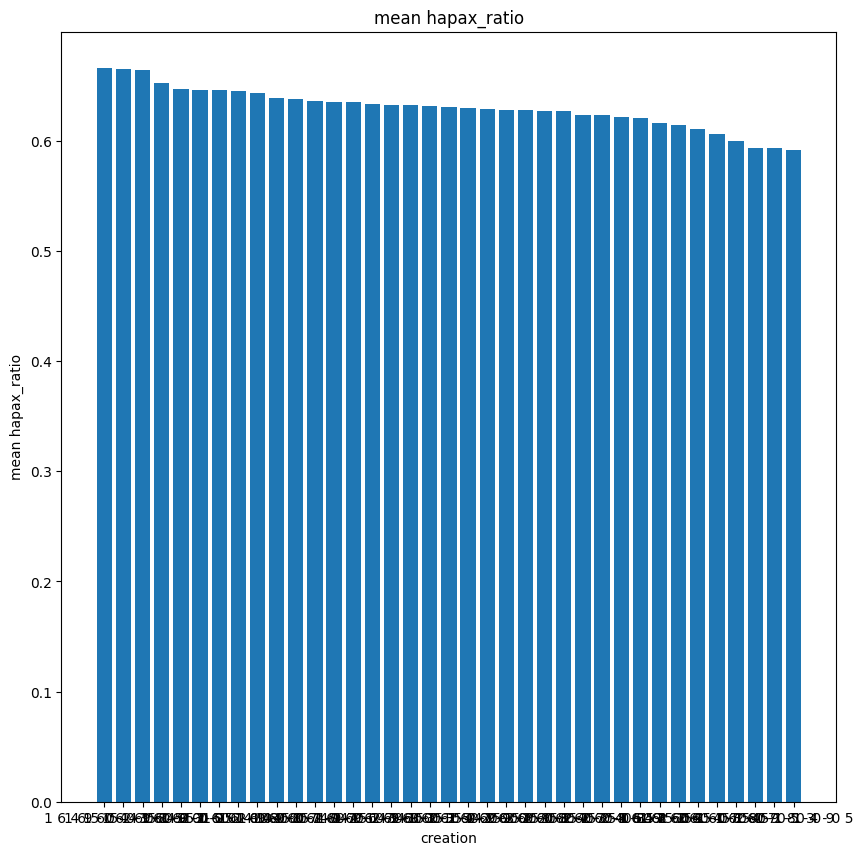

In [73]:
stats2("creation", "hapax_ratio")

1650-01-18: 0.782
1652-07-30: 0.758
1649-03-30: 0.764
1652-01-01: 0.757
1650-09-02: 0.748
1649-06-26: 0.759
1649-08-18: 0.766
1652-08-19: 0.756
1652-03-05: 0.742
1650-03-05: 0.788
1649-02-08: 0.758
1648-04: 0.739
1650-10-01: 0.761
00-00-0000: 0.786
1649-04-16: 0.790
1652-02-27: 0.759
1651-04-05: 0.722
1652-08-07: 0.742
1649-09-05: 0.764
1652-04-20: 0.758
1649-03-15: 0.744
1651-04-18: 0.714
1652-04-07: 0.765
1650-05-09: 0.716
1649-03-22: 0.755
1651-07-06: 0.749
1652-09-24: 0.757
1649-12-11: 0.766
1652-08-26: 0.745
1650-07-04: 0.766
1651-08-17: 0.732
1651-09-13: 0.723
1651-09-07: 0.740
1652-08-23: 0.781
1652-04-28: 0.734
1651-12-12: 0.794
1649-07-17: 0.759


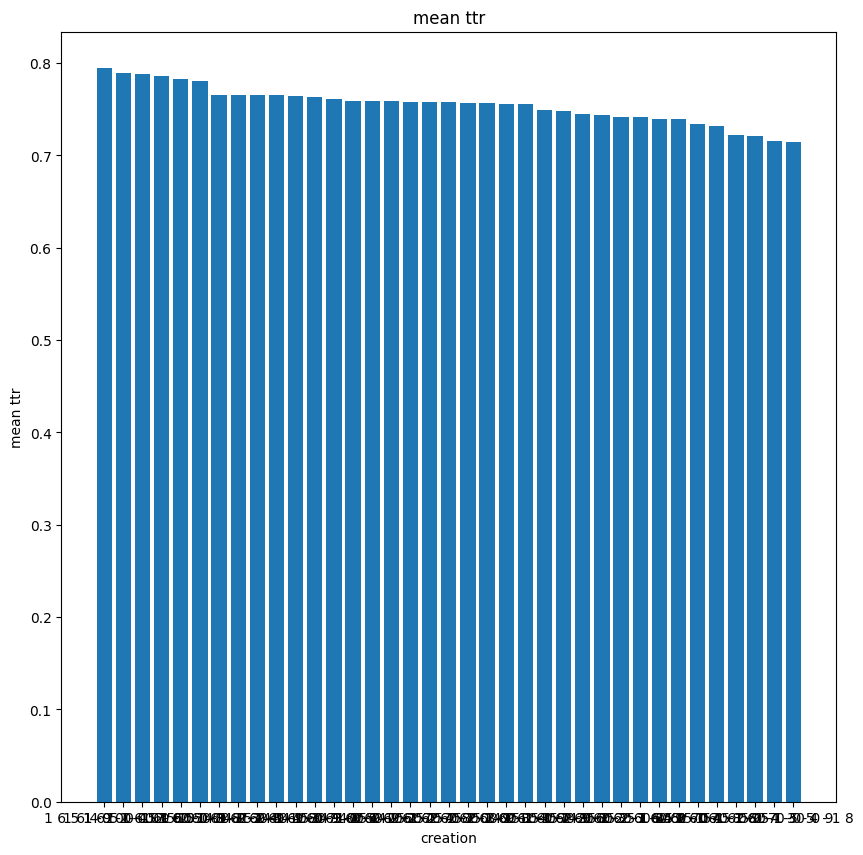

In [74]:
stats2("creation", "ttr")

False: 16612.189
True: 134272.917


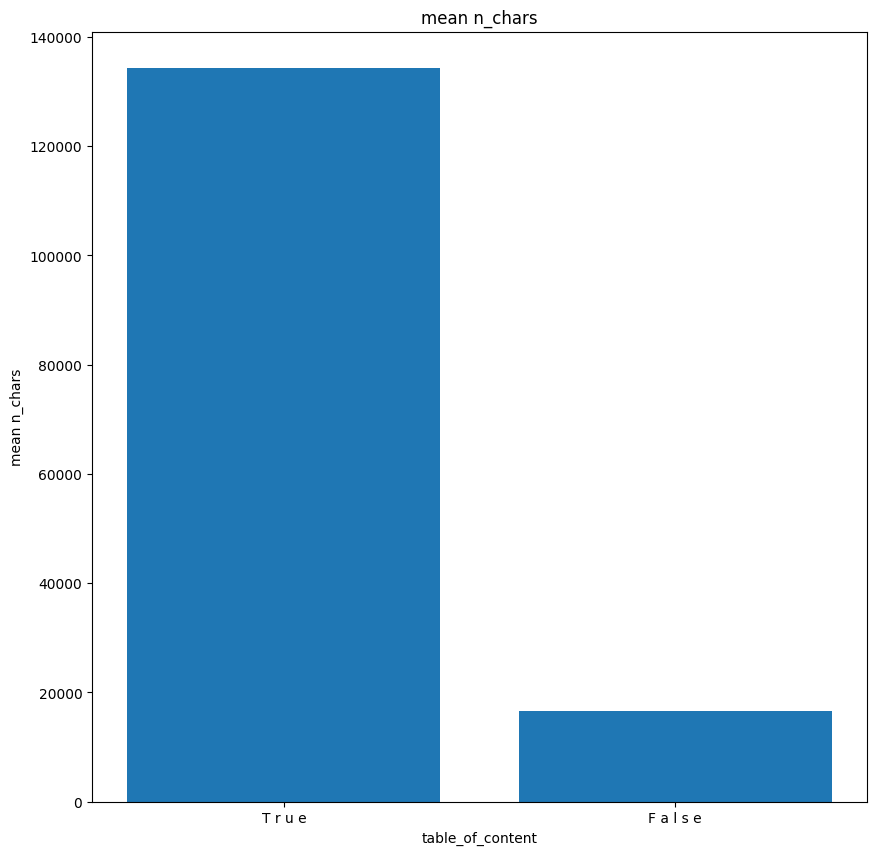

False: 0.759
True: 0.699


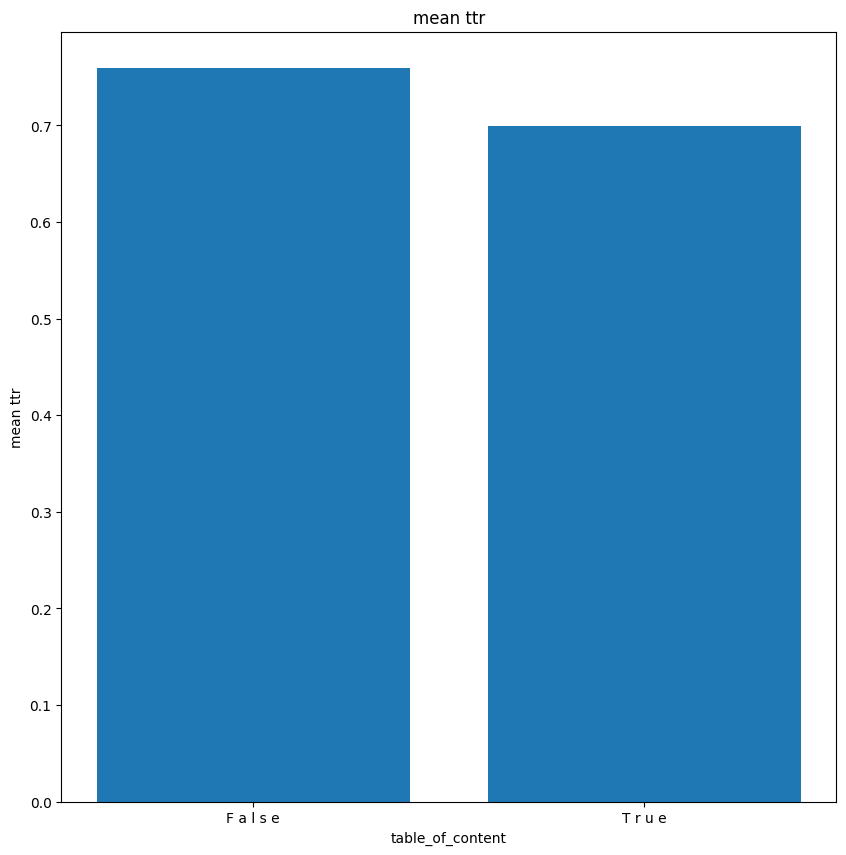

In [75]:
stats2("table_of_content", "n_chars")
stats2("table_of_content", "ttr")

In [76]:
import string

french_chars = {'è', 'é', 'ê', 'ë', 'î', 'ï', 'ô', 'œ', 'ù', 'û', 'ü', 'À', 'Â', 'Ä', 'Æ', 'Ç', 'È', 'É', 'Ê', 'Ë', 'Î',
                'Ï', 'Ô',
                'Œ', 'Ù', 'Û', 'Ü', 'à', 'â', 'ä', 'æ', 'ç'}.union(set(string.printable))

"ſ" in french_chars, "a" in french_chars, "é" in french_chars, ":" in french_chars

(False, True, True, True)

In [77]:
def mot_is_french(mot):
    for char in mot:
        if char not in french_chars:
            return False
    return True

i, j, tot = 0, 0, 0

for txt in collection_textes:
    for page in txt.pages:
        for phrase in page:
            for mot in phrase.split():
                tot += 1
                if mot_is_french(mot):
                    i += 1
                else:
                    j += 1

print(i, j, tot, i / tot, j / tot)




45007048 2808769 47815817 0.9412585797707901 0.05874142022920993


In [78]:
ttrlist = [(txt.ttr, i) for i, txt in enumerate(collection_textes) if txt.ttr]
hapaxlist = [(txt.hapax_ratio, i) for i, txt in enumerate(collection_textes) if txt.hapax_ratio]
lexicalitelist = [(txt.lexicalite, i) for i, txt in enumerate(collection_textes) if txt.lexicalite]


In [79]:
ttrlist = sorted(ttrlist, key=lambda x: x[0], reverse=True)
hapaxlist = sorted(hapaxlist, key=lambda x: x[0], reverse=True)
lexicalitelist = sorted(lexicalitelist, key=lambda x: x[0], reverse=True)


In [80]:
print(ttrlist[-1])
collection_textes[ttrlist[-1][1]].header

(0.3005464480874317, 2776)


{'form': 'prose',
 'genre': ['déclaration', 'texte officiel'],
 'handwritten_note': False,
 'table_of_content': False,
 'illustration': False,
 'creation': '1649-03-15',
 'change': {'@status': 'corrected', '@when': '2022-03-10', '@who': 'AB'},
 'titre': 'La déclaration de monseigneur le prince de Conty et de\n          messieurs les généraux, enregistrée en parlement, pour l’exécution de l’arrêt du huitième\n          janvier dernier contre le cardinal Mazarin, pour le soulagement du peuple et la paix\n          générale.',
 'dates': {'@type': 'file_creation',
  '@when': '2022-03-02',
  '#text': '2 mars 2022'},
 'langue': 'fra',
 'fichier': 'Moreau886_MAZ.xml',
 'langue_detectee': 'LGERM'}

In [81]:
print(ttrlist[0])
collection_textes[ttrlist[0][1]].header

(0.9859603415834419, 458)


{'form': 'vers',
 'handwritten_note': False,
 'table_of_content': False,
 'illustration': False,
 'creation': '1649-01-26',
 'change': {'@status': 'corrected', '@when': '2022-03-02', '@who': 'AB'},
 'titre': 'Gallicinium nuper auditum, Franciam expilante Mazarino.\n          Quis dedit gallo intelligentiam ? JoB, 38. Qui preparat corvo escam suam. ID.',
 'dates': {'@type': 'file_creation',
  '@when': '2021-11-02',
  '#text': '2 novembre 2021'},
 'langue': 'lat',
 'fichier': 'Moreau1464_GBOOKS.xml',
 'langue_detectee': 'tlfi'}

In [82]:
print(hapaxlist[-1])
collection_textes[hapaxlist[-1][1]].header


(0.2617554858934169, 1557)


{'form': 'vers',
 'subject': 'Condé, Louis de Bourbon, prince de, 1621-1686',
 'handwritten_note': False,
 'table_of_content': False,
 'illustration': False,
 'change': {'@status': 'corrected', '@when': '2022-06-22', '@who': 'AB'},
 'titre': 'Les propriétés diaboliques D. C.',
 'dates': {'@type': 'file_creation',
  '@when': '2021-11-02',
  '#text': '2 novembre 2021'},
 'langue': 'fra',
 'fichier': 'Moreau2923_GALL.xml',
 'langue_detectee': 'LGERM'}

In [83]:
print(hapaxlist[0])
collection_textes[hapaxlist[0][1]].header


(0.9766081871345029, 136)


{'form': 'vers',
 'genre': 'pamphlet',
 'handwritten_note': False,
 'table_of_content': False,
 'illustration': False,
 'creation': '1649-01-30',
 'change': {'@status': 'corrected', '@when': '2021-11-12', '@who': 'AB'},
 'titre': 'Dirœ in Angliam ob patratum scelus, IX februarii\n          1649.',
 'dates': {'@type': 'file_creation',
  '@when': '2021-11-02',
  '#text': '2 novembre 2021'},
 'langue': 'fra',
 'fichier': 'Moreau1098_GBOOKS.xml',
 'langue_detectee': 'tlfi'}

In [84]:
print(lexicalitelist[-1])
collection_textes[lexicalitelist[-1][1]].header


(0.2541899441340782, 2862)


{'form': 'prose',
 'genre': ['avis', 'traduction'],
 'subject': ['Gabriel Naudé', 'Bibliothèque'],
 'handwritten_note': False,
 'table_of_content': False,
 'illustration': False,
 'change': {'@status': 'corrected', '@when': '2022-03-07', '@who': 'AB'},
 'titre': 'Gabrielis Naudæi Vermahnung an die Parlaments Herrn in\n          Parisz / über die Verkauffung der bibliothec des Herrn Cardinalis Mazarini geschehen am\n          29. Decembris 1652.',
 'dates': {'@type': 'file_creation',
  '@when': '2022-03-02',
  '#text': '2 mars 2022'},
 'langue': 'ger',
 'fichier': 'M15370_MAZ.xml',
 'langue_detectee': 'tlfi'}

In [85]:
print(lexicalitelist[0])
collection_textes[lexicalitelist[0][1]].header


(0.9428571428571428, 475)


{'form': 'prose',
 'subject': 'Paris (France)',
 'handwritten_note': False,
 'table_of_content': False,
 'illustration': False,
 'change': {'@status': 'corrected', '@when': '2022-03-02', '@who': 'AB'},
 'titre': 'Le généreux prince aux Parisiens de mourir pour le\n          service du roi et de ne point souffrir le retour du cardinal Mazarin.',
 'dates': {'@type': 'file_creation',
  '@when': '2021-11-02',
  '#text': '2 novembre 2021'},
 'langue': 'fra',
 'fichier': 'Moreau1483_GBOOKS.xml',
 'langue_detectee': 'LGERM'}

In [86]:
len(collection_textes)

3064

In [87]:
collection_textes[1876].lexicalite


0.6270249905814391

In [88]:
to_save = [
    (ttrlist[-1][1], "ttr_min"),
    (ttrlist[0][1], "ttr_max"),
    (hapaxlist[-1][1], "hapax_min"),
    (hapaxlist[0][1], "hapax_max"),
    (lexicalitelist[-1][1], "lexicalite_min"),
    (lexicalitelist[0][1], "lexicalite_max"),
]

from pathlib import Path

Path("extremes").mkdir(parents=True, exist_ok=True)

for i, name in to_save:
    txt = collection_textes[i]
    with open(f"extremes/{name}.txt", "w") as f:
        f.write('\n'.join([txt.path.as_posix(), "\n"] + txt.pages))


paragraphes = []
temp = ""
for e in txt.split("\n\n"):
    if len(e) < 10 :
        continue
    temp += e
    if len(temp) > 2000:
        paragraphes.append(temp)
        temp = ""
